In [1]:
%%capture
%run 2_1_PO_LF_LM_RG.ipynb

# Pull-out curve and state fields

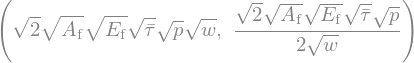

In [2]:
Pw_pull, Pw_pull.diff(w)

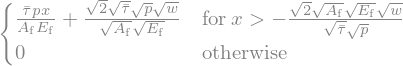

In [3]:
sp.simplify(eps_f_x.subs(P,Pw_pull))

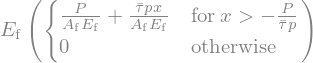

In [4]:
sig_f_x

# Work supply

In [5]:
W_w_ = sp.integrate(Pw_pull, w)

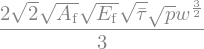

In [6]:
sp.simplify(W_w_)

# Stored energy

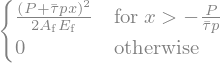

In [7]:
U_x_P_ = sp.Rational(1,2) * A_f * sig_f_x * eps_f_x
sp.simplify(U_x_P_)

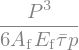

In [8]:
U_P_ = sp.integrate(U_x_P_, (x,-sp.oo,0))
U_P_

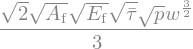

In [9]:
U_w_ = U_P_.subs(P, Pw_pull)
U_w_

# Released energy

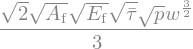

In [10]:
G_w_ = sp.simplify(W_w_ - U_w_)
G_w_

# What is the unloading stiffness at a point $w$?
As we know the area of the triangle below the unloading branch and the corresponding force $P$ we can
obtain the elastic control slip as
\begin{align}
U = \frac{1}{2} P w_{\mathrm{el}} \implies w_\mathrm{el} = \frac{2 U}{P}
\end{align}
So that the amount of plastic slip reads
\begin{align}
w_\mathrm{pl} = w - w_\mathrm{el}
\end{align}

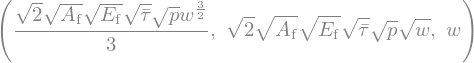

In [22]:
U_w_, Pw_pull, w**(sp.Rational(3,2))/sp.sqrt(w)

In [11]:
w_el_ = 2 * U_w_ / Pw_pull
w_el_

In [12]:
w_pl_ = w - w_el_
sp.simplify(w_pl_)

# Energy release rate

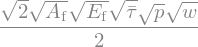

In [13]:
dG_dw_ = G_w_.diff(w)
dG_dw_

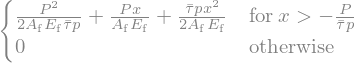

In [23]:
u_fa_x

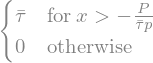

In [24]:
tau_x

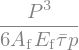

In [28]:
G2_P_ = sp.integrate(p * tau_x * u_fa_x, (x,-sp.oo,0))
G2_P_

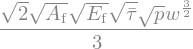

In [29]:
G2_P_.subs(P, Pw_pull)